The aim of this workbook is to explore the Integrated Gradients implementation.

### Modell trainieren

100%|██████████| 8/8 [00:13<00:00,  1.66s/it]


Final metrics: 
Test-Loss: 0.620311004725116
Test-Accuracy: 0.7694566813509545
Train-Loss: 0.6268332472712919
Train-Accuracy: 0.8004224834680382
# Parameters: 103
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=7, bias=True)
  )
)


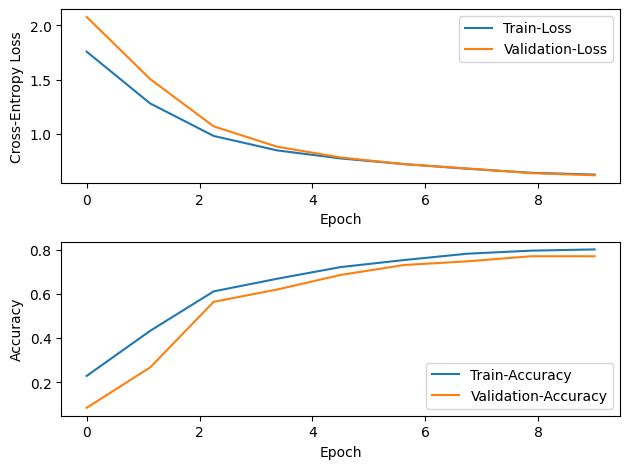

In [2]:
from model.training import train_model_and_visualize
model = train_model_and_visualize([4])

# Instanzweises testen der IG scores

In [6]:
from model.attribution_methods.integrated_gradients import IntegratedGradients
from data.datasets import DryBean
from data.util.utils import DatasetMode

dataset = DryBean(mode=DatasetMode.TEST)

ig = IntegratedGradients(model.get_gradients_with_respect_to_inputs)

x,true_y = dataset[0]
model.eval()
pred_y = model.predict(x)

attribution_score = ig.attribute(x,target_label_index=None,n_steps=500)
print("Attribution Scores: "  + str(attribution_score))
print("Reihenfolge: " + str(attribution_score[0].argsort(descending=True)))

c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)


Attribution Scores: (tensor([-0.0157, -0.0325, -0.0274, -0.0381,  0.0434,  0.0912, -0.0170, -0.0372,
        -0.0078,  0.0810,  0.1199,  0.0288,  0.2967,  0.1568,  0.0193,  0.1161]), 3)
Reihenfolge: tensor([12, 13, 10, 15,  5,  9,  4, 11, 14,  8,  0,  6,  2,  1,  7,  3])


### Testen des Completeness Axioms durch Veränderung der num_steps

100%|██████████| 8/8 [00:09<00:00,  1.23s/it]


Final metrics: 
Test-Loss: 0.620311004725116
Test-Accuracy: 0.7694566813509545
Train-Loss: 0.6268332472712919
Train-Accuracy: 0.8004224834680382
# Parameters: 103
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=7, bias=True)
  )
)


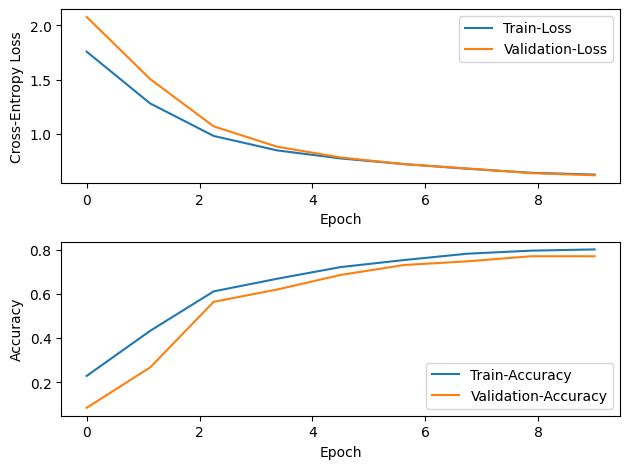

0it [00:00, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
1362it [00:04, 294.93it/s]
1362it [00:12, 110.02it/s]
1362it [00:20, 67.28it/s]
1362it [00:28, 48.33it/s]
1362it [00:37, 36.78it/s]
1362it [00:45, 29.84it/s]
1362it [00:53, 25.44it/s]
1362it [01:00, 22.52it/s]


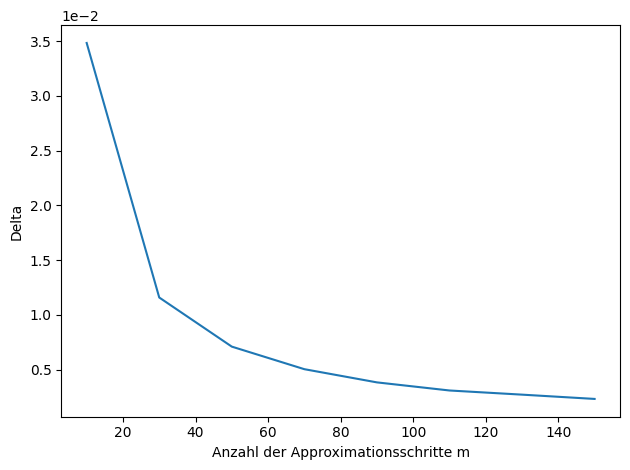

In [1]:
from model.training import train_model_and_visualize
model = train_model_and_visualize([4],num_epochs=8)

from evaluation import IntegratedGradientsEvaluator

evaluator = IntegratedGradientsEvaluator(model=model)

evaluator.visualize_completess_deltas_comparison(range(10,151,20))

num_steps = 30

In [3]:
from evaluation import IntegratedGradientsEvaluator

evaluator = IntegratedGradientsEvaluator(model=model)
evaluator.completeness_deltas_statistics(n_steps=30)

0it [00:00, ?it/s]

c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
1362it [00:17, 77.99it/s] 

Mittlere absolute Abweichung:  1.16e-02
Maximum der betragsmäßigen Abweichung;  1.02e-01
Minimum der betragsmäßigen Abweichung:  6.41e-05


num_steps = 50

In [4]:
evaluator.completeness_deltas_statistics(n_steps=50)

1362it [00:25, 53.10it/s]

Mittlere absolute Abweichung:  7.09e-03
Maximum der betragsmäßigen Abweichung;  6.05e-02
Minimum der betragsmäßigen Abweichung:  1.55e-06


num_steps = 100

In [5]:
evaluator.completeness_deltas_statistics(n_steps=100)

1362it [00:44, 30.33it/s]

Mittlere absolute Abweichung:  3.45e-03
Maximum der betragsmäßigen Abweichung;  3.03e-02
Minimum der betragsmäßigen Abweichung:  1.91e-05
